## Simple linear regression

Simple linear regression is a linear regression model with a single explanatory variable and a continuous target variable. The purpose of this model is to predict the target variable as accurately as possible, having the dependent variable value as a function of the independent variable. <br>
The result will be a best fitted line in which the sum of squared residuals (the difference between the predictions and the actuals squared) is as low as possible.

In this notebook I will walk through the formulas used, try to get an understanding as to why the very simple equations work in finding the optimal solution, and show the best fitted line using some plots.

The formula for simple linear regression: 
![alt text](images/simple_linear.jpg "Simple linear regression formula")

In which B0 and B1 are calculated as:
![alt text](images/beta_formulae.PNG "Beta formulae")

B1 can be simplified to:
![alt text](images/simplified_b1.PNG "Simplified B1")

In which the covariance is:
![alt text](images/simplified_b0.PNG "Simplified B0.PNG")

And variance is defined as:
![alt text](images/variance_formula.PNG "Variance formula")

Why this formula? The sum of squared error (SSE) must be minimized to find the best fit
![alt text](images/SSE_formula.PNG "SSE formula")

The error is the difference between the predictions and the actuals
![alt text](images/residuals_formula.PNG "Residuals formula")

And the prediction is just the combination of beta's multiplied with X
![alt text](images/SSE_withpred.PNG "SSE with predictions")

The combinations of betas in relation to the SSE is convex:
![alt text](images/residual_convex.PNG "residual_convex.PNG")

Therefore taking partial derivatives of the last formula will result is the unsimplified b1 and b0 formulae. 
For b0, start with applying the power rule (the inner function to the power of 2 becomes 2x the inner function) 
as well as the inner function's derivative (-1 * b0 becomes -1) 
Note that the chain rule is applied to sticht the two together:
![alt text](images/LR_derivative_step1.PNG "LR derivative step 1")

Multiplying both outer functions with each other results in -2 times the inner equation. 
Simplify by dividing both sides by -2 (0 / -2 is still 0) 
Then take out the B0, as we want to know the specific formula or partical derivative for this constant 
We do so by first adding the sum from i to n for B0 to each side, and then to get the average we simply devide by n
![alt text](images/LR_derivative_step2.PNG "LR derivative step 2")

Now since we devide the side with y and b1 by n, this is basically the same as taking the average 
Therefore, we can simplify the equation more by stating that b0 is equal to the mean of y minus b1 (constant) multiplied with the mean of X
![alt text](images/simplified_derivative_equation_b0.PNG "Simplified derivative equation B0")

Similarly for B1, taking the partial derivative: 
The first steps are the same, we just have -X rather than -1. 
![alt text](images/simplified_derivative_equation_b1.PNG "Simplified derivative equation B1")

This means we can expand, by multplying X with all the inner terms:
![alt text](images/expansion_b1.PNG "Expansion B1")

Already knowing that b0 is meany - b1 * meanX we can substitute this in:
![alt text](images/substitute_b0_in_b1.PNG "Substitute B0 in B1")

We can now multiply the brackets out 
Followed by replacing - sum y/n by 1/n * sum y, similar for X
![alt text](images/multiply_brackets_b0.PNG "Multiply brackets B0")

Now we have to take out the b1 as we did with b0 to get towards a formula. 
Add + b1 * sum(Xi^2) to both sides, 
Subtract b1 * 1/n sum(Xi)* sum(xi) off of both sides 
Devide both sides by both of the terms b1 gets multiplied with in order to reach b1 being singel on one side:
![alt text](images/get_b1_to_one_side.PNG "Get B1 to one side")

Again, 1/n sum(Xi) or 1/n sum(yi) can just as easily be written as the means. 
Making the formula more easy to interpret, and just another way of writing the covariance between x and y devided by the variance of x.
![alt text](images/final_formula_b1.PNG "Final formula B1")

### Proof that this is actually true

In [2]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from math import sqrt
from sklearn.metrics import mean_squared_error
from IPython.core.interactiveshell import InteractiveShell

In [3]:
# Notebook options
InteractiveShell.ast_node_interactivity = "all"
warnings.filterwarnings('ignore')
%pylab inline
pylab.rcParams['figure.figsize'] = (9, 6)

Populating the interactive namespace from numpy and matplotlib


In [4]:
# UDF's
def Variance(x):
    return np.sum((x - np.mean(x))**2) / len(x)

def Covariance(x, y):
    return np.sum((x - np.mean(x)) * (y - np.mean(y))) / (len(x) -1)

We will use a very simple Swedish Auto Insurance Dataset, which has two columns. The predictor is the total number of claims in a month, the target is the total payment resulting from these claims in thousands of Swedish Kronor.

In [5]:
# Import data
data = pd.read_csv('datasets/insurance.csv', header=None)
data.columns = ['X', 'Y']

In [7]:
# Show a preview of the data
data.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


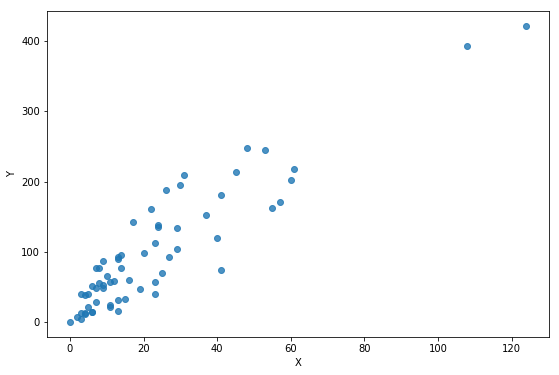

In [9]:
# Show what the plot looks like (notice the clear correlation)
_ = sns.regplot(x = data.X, y= data.Y, fit_reg=False)

In [11]:
# Fore the beta calculations we need both means and variances
mean_x = np.mean(data.X)
mean_y = np.mean(data.Y)

var_x = Variance(data.X)
var_y = Variance(data.Y)

print('The mean of x is {}, while the mean of y = {}'.format(round(mean_x, 2), round(mean_y, 2)))
print('The variance of x is {}, while the variance of y = {}'.format(round(var_x, 2), round(var_y, 2)))

The mean of x is 22.9, while the mean of y = 98.19
The variance of x is 536.66, while the variance of y = 7505.05


In [14]:
# As for the B1 we need the coviance as well
print('The UDF covariance function results in the same as Python base covariance function, this is: {}'.format(
      round(Covariance(data.X, data.Y),5) == round(cov(data.X, data.Y)[0,1],5))) 
print('The covariance of X and Y is: {}'.format(round(Covariance(data.X, data.Y),2)))

The UDF covariance function results in the same as Python base covariance function, this is: True
The covariance of X and Y is: 1861.6


In [15]:
# B1 is the coefficient; the rate at which Y increases when X increases with 1
B1 = Covariance(data.X, data.Y) / Variance(data.X)
print('When 1 extra claim is made, on average this results in an additional payment of {} Kronen'.format(round(B1,2)))

When 1 extra claim is made, on average this results in an additional payment of 3.47 Kronen


In [19]:
# B0 is the prediction for Y when X is 0
B0 = np.mean(data.Y) - B1 * np.mean(data.X)
print('Although it would make more sense if B0 would start at 0,' + 
      ' it appears the line is best fitted when b0 is: {}'.format(round(B0,2)))

Although it would make more sense if B0 would start at 0, it appears the line is best fitted when b0 is: 18.73


In [20]:
# Prediction function
def slr_pred(x, B0, B1):
    """
    Using the beta and coefficient of the number of claims, 
    we can make predictions for the expected payout for any number of claims.
    
    :params x: The number of claims for which we would like to know the expected payout.
    :params B0: The starting point on the y-axis when x is 0.
    :params B1: The coefficient of the increase in expected payout with respect to the number of claims.
    
    Output: Expected payout in Swedisch Kronen x1000
    """
    return B0 + B1 * x

In [23]:
# Let's try the function using our predefined B0 and B1
print('The expected total payment for 20 claims would be: {} Swedish Kronen'.format(round(slr_pred(20, B0, B1), 2)))

The expected total payment for 20 claims would be: 88.11 Swedish Kronen


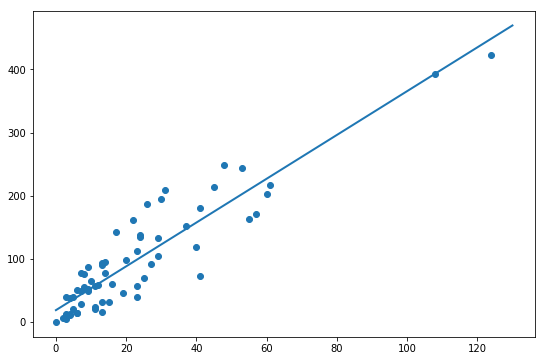

In [24]:
# Plot the best fitted line
_ = plt.scatter(data['X'], data['Y'])
_ = plt.plot([0, 130], [B0, B0 + B1 * 130], linewidth=2)

As we can see, the line fits well into the cloud of observations.

In [26]:
# Use prediction function to predict y's for each x
data['preds'] = slr_pred(data.X, B0, B1)

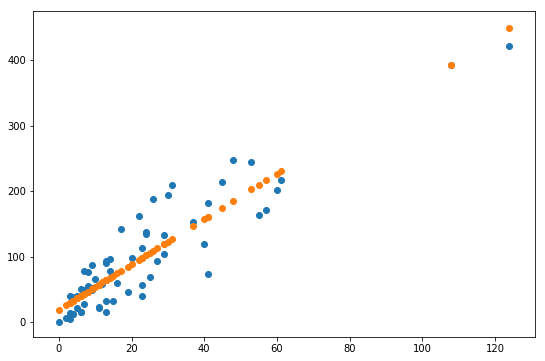

In [27]:
# Plot the predictions versus the actuals
_ = plt.scatter(data['X'], data['Y'])
_ = plt.scatter(data['X'], data['preds'])

In [48]:
# Check the (root) mean squared error, to see how well the model behaves
MSE = np.sum((data['Y'] - data['preds'])**2) / len(data.X)
RMSE = sqrt(MSE)

print('MSE: {}'.format(MSE))
print('RMSE: {}'.format(RMSE))

MSE: 1252.3689611947675
RMSE: 35.38882537178604


With only one predictor the model is already not very far of for every estimation. <br>
Perhaps the model could be improved by adding extra features, for example a classification of each claim being low, medium or high damage.